In [4]:
print('hello world')

#!pip install qutip

hello world
  Obtaining dependency information for qutip from https://files.pythonhosted.org/packages/10/cd/837647e62ab82a6ff4b2bb2bf22ef4b9c70ada215250c17fb18802bc5bfe/qutip-4.7.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/5.4 MB ? eta -:--:--
   ---------------------------------------- 0.1/5.4 MB 1.1 MB/s eta 0:00:05
   - -------------------------------------- 0.2/5.4 MB 1.1 MB/s eta 0:00:05
   - -------------------------------------- 0.2/5.4 MB 1.4 MB/s eta 0:00:04
   -- ------------------------------------- 0.3/5.4 MB 1.4 MB/s eta 0:00:04
   -- ------------------------------------- 0.4/5.4 MB 1.5 MB/s eta 0:00:04
   --- ------------------------------------ 0.5/5.4 MB 1.6 MB/s eta 0:00:04
   ---- ----------------------------------- 0.6/5.4 MB 1.8 MB/s eta 0:00:03
   ------- -------------------------------- 1.1/5.4 MB 2.6 MB/s eta 0:00:02
   ---------- ----------------------------- 1.4/5.4 MB 3.0 MB/s eta 0:00:02
   -------------- -------------

In [28]:
#Aprendendo o QuTip

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
import qutip as qtp

%matplotlib inline

a = fock(2,1) #primeira entrada é a dimensão, a segunda é o estado populado

b = coherent(10, 0.1) #cria um estado coerente com N=10, alpha=0.1

#Representando esses mesmos estados com a matriz densidade:

fock_dm(2,1)

c = coherent_dm(6, 0.1)

A fidelidade desses estados é: 0.9110936148710452
A distância de Bures desses estados é: 0.42167851529086653


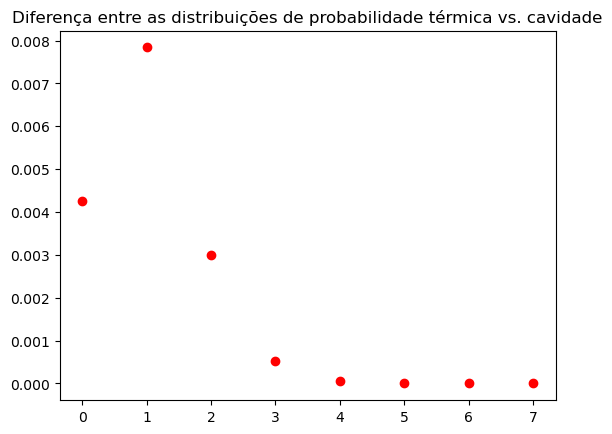

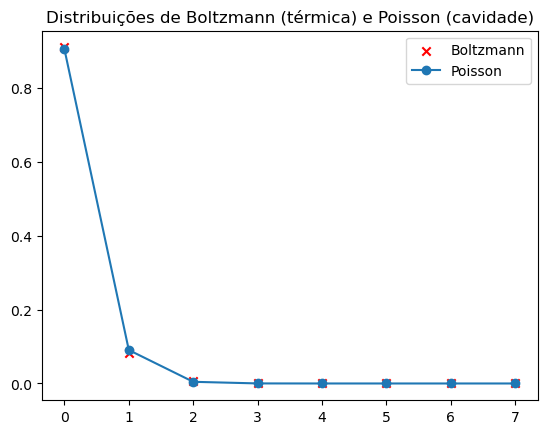

In [113]:
#Checando fidelidade do estado térmico construído na cavidade

import scipy.special

#Estado preparado:

alpha_cav = 0.1*np.sqrt(10)
nmed_cav = alpha_cav**2

estd_cav = coherent_dm(8, alpha_cav)

P_n = np.array([np.exp(-nmed_cav)*(nmed_cav**i)/(scipy.special.factorial(i)) for i in range(0,8)])

#Estado térmico:

hbar_omegac_betac = 0.95

n_th = nmed_cav

P_c = [n_th**n/((1+n_th)**(n+1)) for n in range(0,8)]

P_c = np.array(P_c)

estd_termico = 0*fock_dm(8,0)

for i in range(0,8):
    estd_termico = P_c[i]*fock_dm(8, i) + estd_termico

#Calculando a fidelidade:

fidelidade = qtp.fidelity(estd_cav, estd_termico)
bures = qtp.bures_dist(estd_cav, estd_termico)
print('A fidelidade desses estados é:', fidelidade)
print('A distância de Bures desses estados é:', bures)

#Plotando distribuições

n = [i for i in range(0,8)]

plt.scatter(n, np.abs(P_c-P_n), marker='o', color='red')
#plt.plot(n, P_n, marker='o')
plt.title('Diferença entre as distribuições de probabilidade térmica vs. cavidade')
plt.show()

plt.scatter(n, P_c, marker='x', color='red', label='Boltzmann')
plt.plot(n, P_n, marker='o', label='Poisson')
plt.legend()
plt.title('Distribuições de Boltzmann (térmica) e Poisson (cavidade)')
plt.show()